In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import time

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

from mylib.my_xgb import BinaryDecisionTree as BDT
from mylib.my_xgb import add_class

from db_pipelines import db_add_trees_testing_pipeline as add_pipeline
from db_pipelines import db_continued_training_testing_pipeline as cont_pipeline


import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# open file

data_folder = Path("../../../data/DryBeanDataset/")
model_folder = Path("../../../models/DryBeanDataset")
file_to_open = data_folder / "Dry_Bean_Dataset.xlsx"

In [3]:
# read and prepare data

data = pd.read_excel(file_to_open)

labels_dict = {key:value for (value,key) in enumerate(data["Class"].unique())}
data["Class"] = data["Class"].map(labels_dict)
#data.Class.astype("category").cat.codes

# need feature matrix X and labels labels for xgboost
labels = data["Class"]
X = data.drop(["Class"],axis=1,inplace=False)

Adding class 6
Training full models
Accuracy of full model on old data:  0.920923994038748
Accuracy of full model on new data:  0.9183446136491821
Accuracy of full model on test data:  0.9140837311788467
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


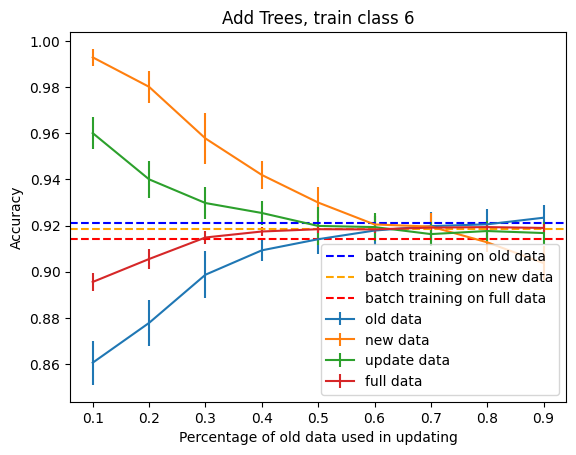

Adding class 5
Training full models
Accuracy of full model on old data:  0.9314441913439635
Accuracy of full model on new data:  0.8762518968133536
Accuracy of full model on test data:  0.9141020932794712
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


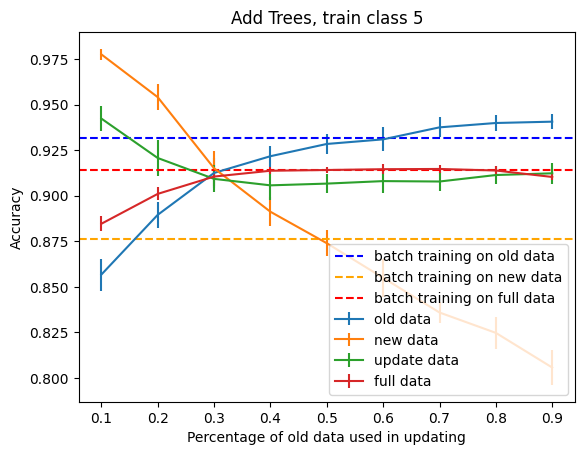

Adding class 0
Training full models
Accuracy of full model on old data:  0.9182708908839778
Accuracy of full model on new data:  0.9343857918105576
Accuracy of full model on test data:  0.9139919206757252
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


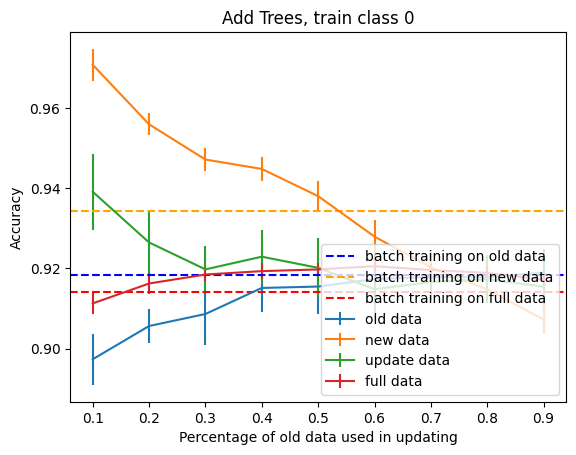

Adding class 4
Training full models
Accuracy of full model on old data:  0.914752204057177
Accuracy of full model on new data:  0.9523858921161825
Accuracy of full model on test data:  0.9131105398457585
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


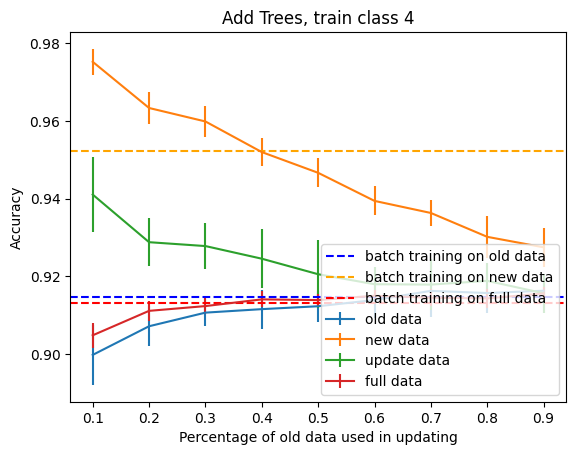

Adding class 3
Training full models
Accuracy of full model on old data:  0.9165887655454469
Accuracy of full model on new data:  0.9475766871165645
Accuracy of full model on test data:  0.9129636430407638
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


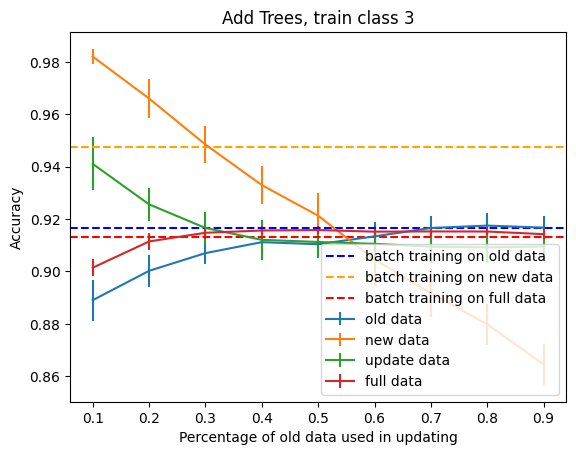

Adding class 1
Training full models
Accuracy of full model on old data:  0.9248474245259988
Accuracy of full model on new data:  0.8828290468986383
Accuracy of full model on test data:  0.9142857142857143
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


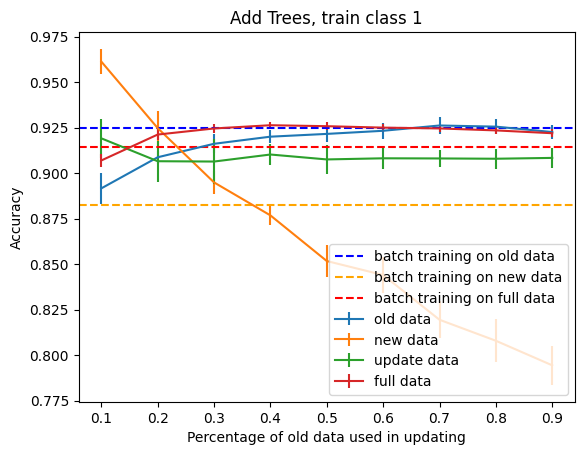

Adding class 2
Training full models
Accuracy of full model on old data:  0.9173733669493469
Accuracy of full model on new data:  0.9996168582375479
Accuracy of full model on test data:  0.9134594197576202
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


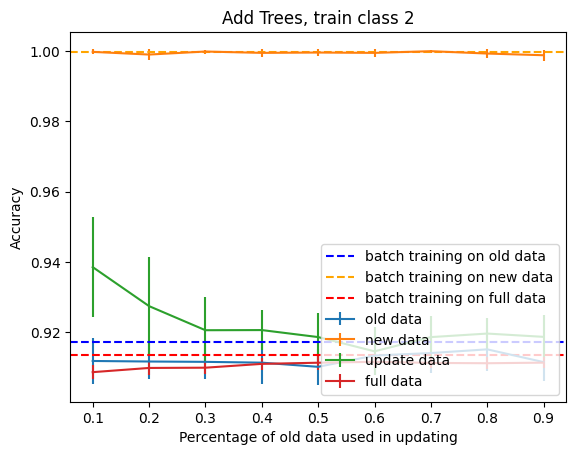

In [4]:
# go through all classes

for i in class_distributions.label_proportions(labels).index:
    new_class = i
    num_models = 20
    proportion_of_old_data = [i*0.1 for i in range(1,10)]

    cont_pipeline.db_continued_training_testing_pipeline(new_class,
                                                       proportion_of_old_data,
                                                       num_models)

Adding class 6
Training full models
Accuracy of full model on old data:  0.9210730253353205
Accuracy of full model on new data:  0.9172588832487311
Accuracy of full model on test data:  0.9111274329783328
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old 

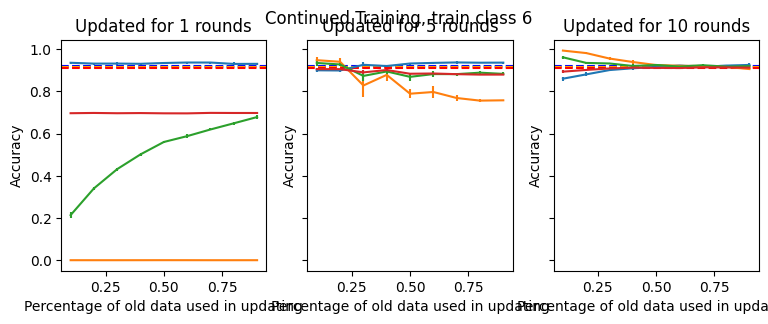

Adding class 5
Training full models
Accuracy of full model on old data:  0.9317175398633257
Accuracy of full model on new data:  0.8753414264036419
Accuracy of full model on test data:  0.9139919206757252
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old 

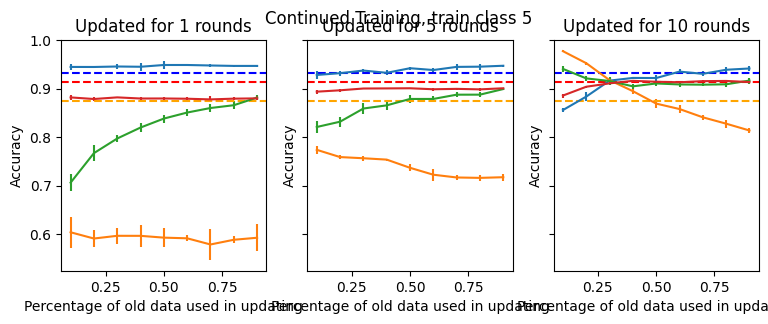

Adding class 0
Training full models
Accuracy of full model on old data:  0.9176622928176794
Accuracy of full model on new data:  0.9336951159348791
Accuracy of full model on test data:  0.9098053617333821
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old 

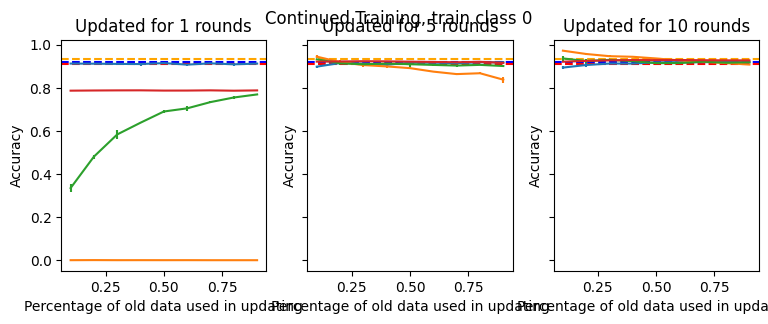

Adding class 4
Training full models
Accuracy of full model on old data:  0.914610973208936
Accuracy of full model on new data:  0.9517634854771784
Accuracy of full model on test data:  0.9099522585383767
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old d

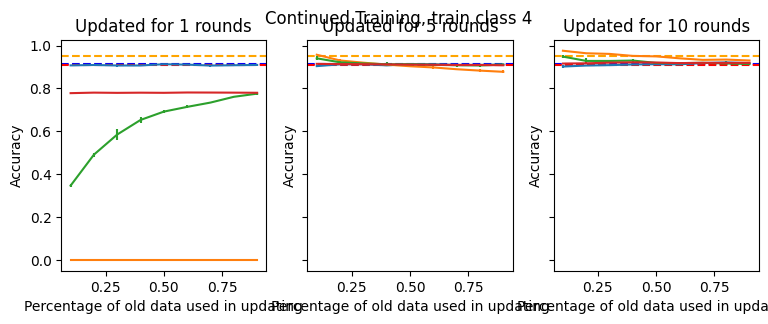

Adding class 3
Training full models
Accuracy of full model on old data:  0.9171688506802436
Accuracy of full model on new data:  0.9465030674846625
Accuracy of full model on test data:  0.9117150201983106
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old 

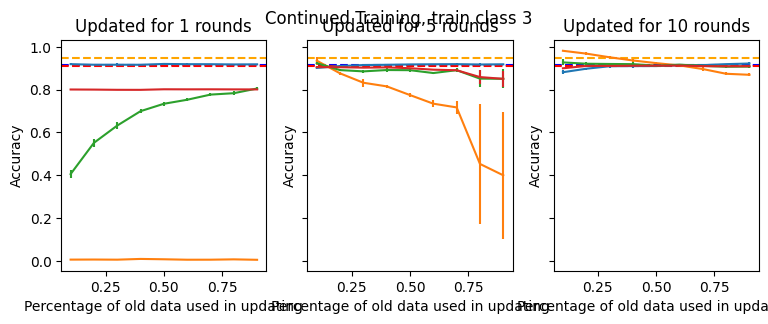

Adding class 1
Training full models
Accuracy of full model on old data:  0.9249084547155993
Accuracy of full model on new data:  0.8821482602118003
Accuracy of full model on test data:  0.9159015791406537
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old 

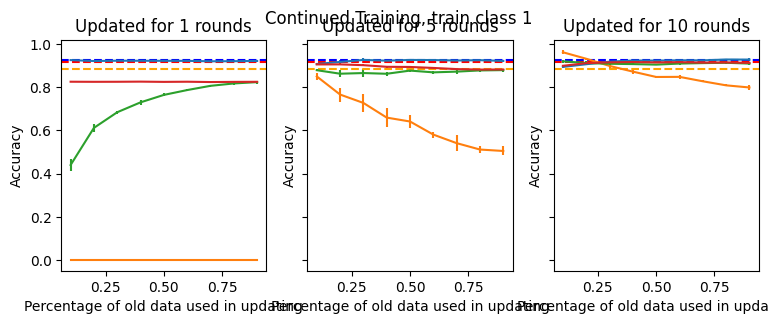

Adding class 2
Training full models
Accuracy of full model on old data:  0.9171518068607227
Accuracy of full model on new data:  1.0
Accuracy of full model on test data:  0.9142122658832171
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.

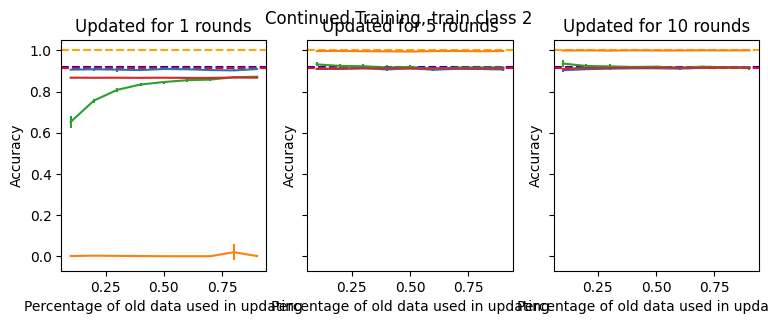

In [4]:
# go through all classes

for i in class_distributions.label_proportions(labels).index:
    new_class = i
    num_models = 5
    proportion_of_old_data = [i*0.1 for i in range(1,10)]

    
    cont_pipeline.db_continued_training_testing_pipeline(new_class,
                                                         proportion_of_old_data,
                                                         num_models,
                                                         num_round=10,
                                                         num_round_update=[1,5,10])